In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
control_data = np.genfromtxt('data/control.csv', delimiter=',')
bl_data = np.genfromtxt('data/body_lotion.csv', delimiter=',')

In [15]:
col_val = 's1 s2 s3 s4 s5 s6 s7 s8'.split()

In [16]:
control_df = pd.DataFrame(control_data, columns=col_val)
control_df['target'] = 'control'
control_df

,s1,s2,s3,s4,s5,s6,s7,s8,target
0,2731.0,2721.0,2672.0,3109.0,3315.0,3067.0,2763.0,2668.0,control
1,2705.0,2718.0,2670.0,2941.0,3132.0,3032.0,2751.0,2668.0,control
2,2692.0,2716.0,2673.0,3106.0,3298.0,3038.0,2751.0,2668.0,control
3,2624.0,2714.0,2670.0,2941.0,3145.0,2988.0,2757.0,2669.0,control
4,2711.0,2712.0,2673.0,3173.0,3359.0,2989.0,2732.0,2669.0,control
...,...,...,...,...,...,...,...,...,...
195,2688.0,2674.0,2670.0,2919.0,2914.0,2741.0,2710.0,2668.0,control
196,2689.0,2675.0,2668.0,2737.0,2752.0,2741.0,2686.0,2668.0,control
197,2715.0,2675.0,2669.0,2790.0,2744.0,2724.0,2681.0,2668.0,control
198,2697.0,2674.0,2667.0,2803.0,2861.0,2749.0,2696.0,2668.0,control


In [17]:
bl_df = pd.DataFrame(bl_data, columns=col_val)

In [22]:
bl_df = bl_df.dropna()[0:200]
bl_df['target'] = 'body lotion'
bl_df

,s1,s2,s3,s4,s5,s6,s7,s8,target
0,673.0,7.0,106.0,17625.0,17624.0,17625.0,2632.0,2667.0,body lotion
1,682.0,7.0,106.0,17625.0,17624.0,17625.0,2632.0,2667.0,body lotion
2,665.0,7.0,106.0,17625.0,17624.0,17625.0,2633.0,2667.0,body lotion
3,678.0,7.0,106.0,17626.0,17625.0,17625.0,2649.0,2665.0,body lotion
4,632.0,7.0,107.0,17625.0,17625.0,17625.0,2638.0,2667.0,body lotion
...,...,...,...,...,...,...,...,...,...
195,901.0,7.0,104.0,17625.0,17625.0,17625.0,2634.0,2666.0,body lotion
196,892.0,7.0,104.0,17625.0,17625.0,17626.0,2640.0,2667.0,body lotion
197,893.0,7.0,104.0,17626.0,17625.0,17625.0,2615.0,2666.0,body lotion
198,930.0,7.0,104.0,17626.0,17625.0,17625.0,2616.0,2666.0,body lotion


In [23]:
df = pd.concat([control_df, bl_df])

In [26]:
df

,s1,s2,s3,s4,s5,s6,s7,s8,target
0,2731.0,2721.0,2672.0,3109.0,3315.0,3067.0,2763.0,2668.0,control
1,2705.0,2718.0,2670.0,2941.0,3132.0,3032.0,2751.0,2668.0,control
2,2692.0,2716.0,2673.0,3106.0,3298.0,3038.0,2751.0,2668.0,control
3,2624.0,2714.0,2670.0,2941.0,3145.0,2988.0,2757.0,2669.0,control
4,2711.0,2712.0,2673.0,3173.0,3359.0,2989.0,2732.0,2669.0,control
...,...,...,...,...,...,...,...,...,...
195,901.0,7.0,104.0,17625.0,17625.0,17625.0,2634.0,2666.0,body lotion
196,892.0,7.0,104.0,17625.0,17625.0,17626.0,2640.0,2667.0,body lotion
197,893.0,7.0,104.0,17626.0,17625.0,17625.0,2615.0,2666.0,body lotion
198,930.0,7.0,104.0,17626.0,17625.0,17625.0,2616.0,2666.0,body lotion


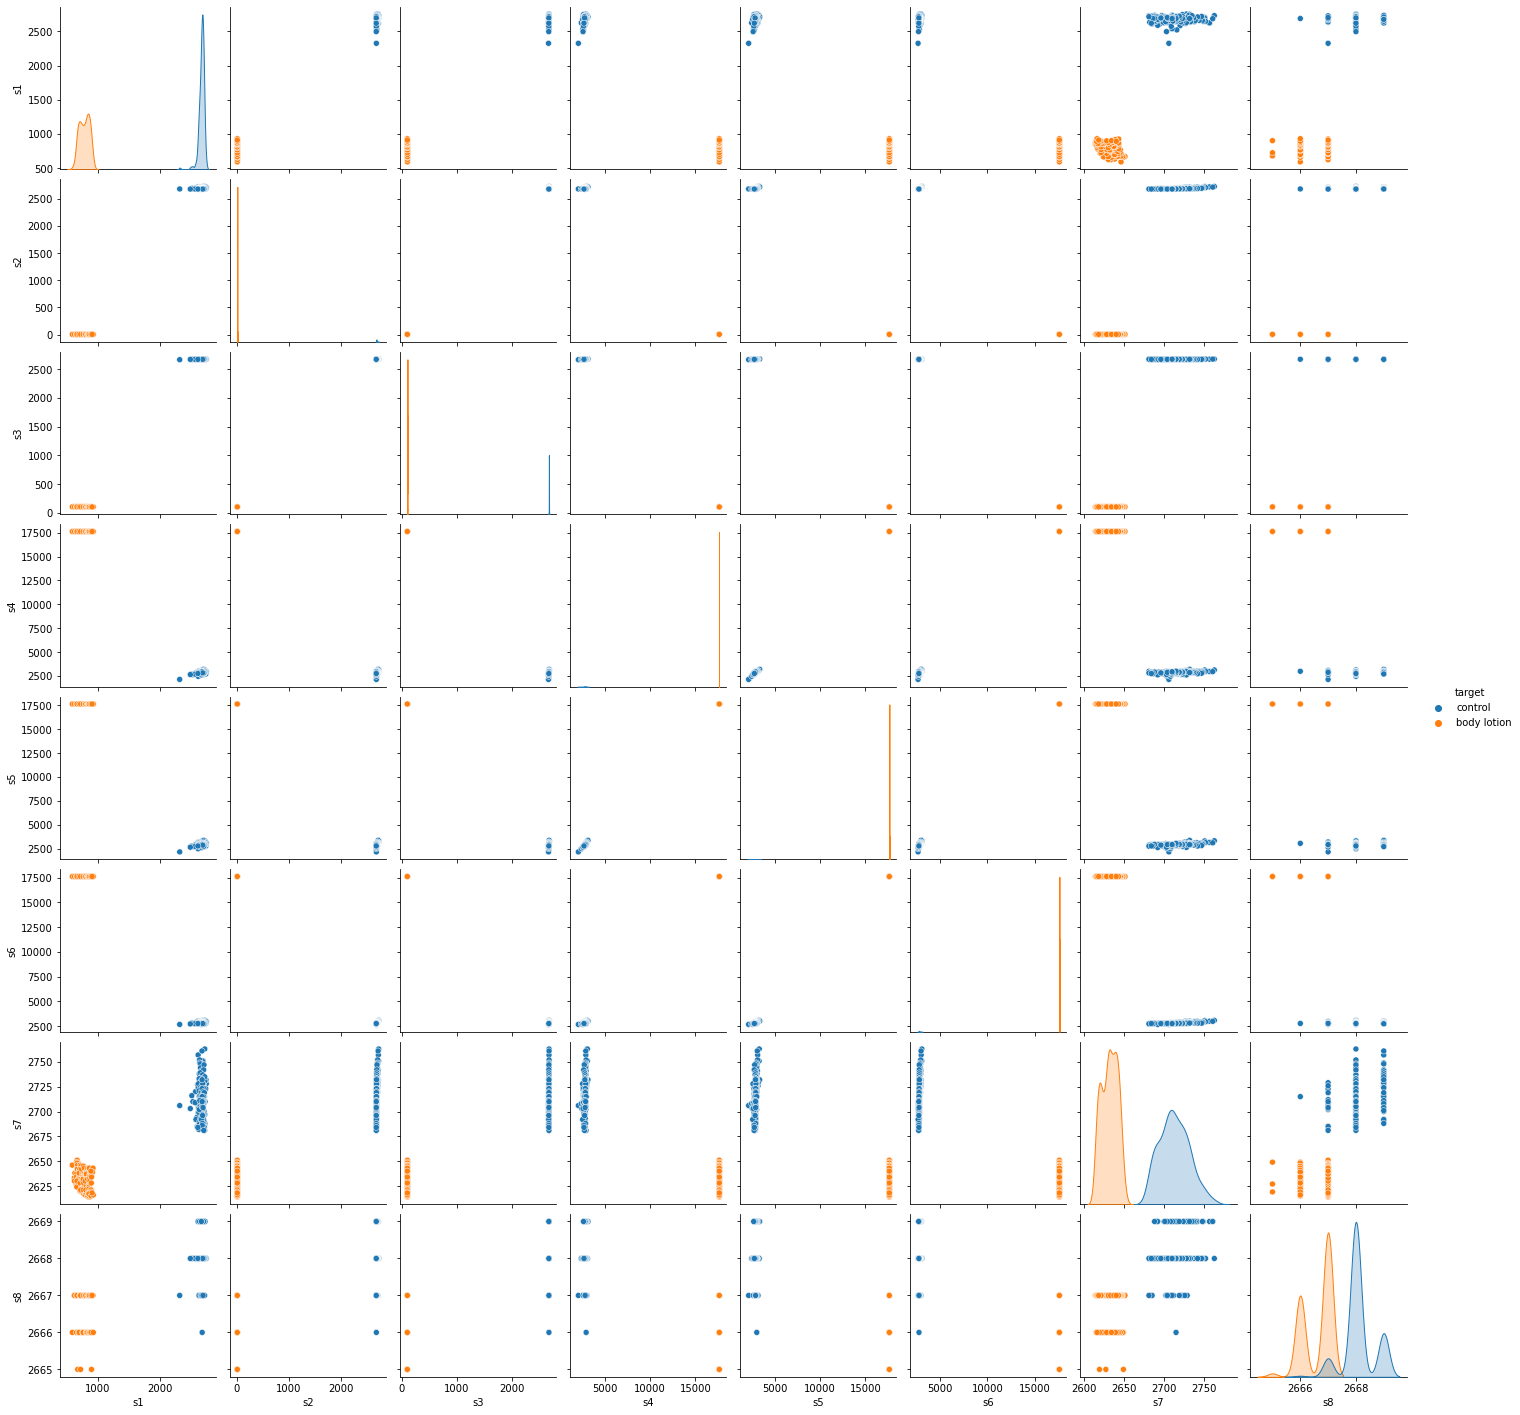

In [27]:
sns.pairplot(df, hue='target')

In [25]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
log_mod = LogisticRegression()

In [30]:
log_mod.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = log_mod.predict(X_test)

In [32]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

 body lotion       1.00      1.00      1.00        63
     control       1.00      1.00      1.00        69

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

[[63  0]
 [ 0 69]]
